In [1]:
import os
import glob
import pandas as pd
os.chdir("D:/Uber Data Analysis/Uber-dataset")

In [2]:
import numpy as np

In [3]:
import calendar

In [4]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [5]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [6]:
df=pd.read_csv("combined_csv.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [7]:
#df.rename_axis('datetime')

In [8]:
df.shape

(4534327, 4)

In [9]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [10]:
df["Date/Time"]=pd.to_datetime(df["Date/Time"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 138.4+ MB


In [12]:
df["Date"]=df["Date/Time"].dt.date

In [13]:
#df["Date"]=pd.to_datetime(df["Date"])

In [14]:
df["Month"]=df["Date/Time"].dt.month

In [15]:
df["OnlyDate"]=df["Date/Time"].dt.day

In [16]:
df["Weekday"]=df["Date/Time"].dt.day_name()

In [17]:
df["Hour"]=df["Date/Time"].dt.hour

In [18]:
df[75:90]

,Date/Time,Lat,Lon,Base,Date,Month,OnlyDate,Weekday,Hour
75,2014-04-01 06:32:00,40.7322,-73.9863,B02512,2014-04-01,4,1,Tuesday,6
76,2014-04-01 06:33:00,40.7703,-73.9660,B02512,2014-04-01,4,1,Tuesday,6
77,2014-04-01 06:34:00,40.7221,-74.0018,B02512,2014-04-01,4,1,Tuesday,6
78,2014-04-01 06:35:00,40.7588,-73.9895,B02512,2014-04-01,4,1,Tuesday,6
79,2014-04-01 06:36:00,40.7677,-73.9656,B02512,2014-04-01,4,1,Tuesday,6
80,2014-04-01 06:37:00,40.7404,-74.0076,B02512,2014-04-01,4,1,Tuesday,6
81,2014-04-01 06:38:00,40.7679,-73.9599,B02512,2014-04-01,4,1,Tuesday,6
82,2014-04-01 06:39:00,40.7694,-73.9852,B02512,2014-04-01,4,1,Tuesday,6
83,2014-04-01 06:40:00,40.7858,-73.9546,B02512,2014-04-01,4,1,Tuesday,6
84,2014-04-01 06:40:00,40.7742,-73.9491,B02512,2014-04-01,4,1,Tuesday,6


In [19]:
df.drop(["Lat","Lon","Date/Time"],axis=1,inplace=True)
df.head()

,Base,Date,Month,OnlyDate,Weekday,Hour
0,B02512,2014-04-01,4,1,Tuesday,0
1,B02512,2014-04-01,4,1,Tuesday,0
2,B02512,2014-04-01,4,1,Tuesday,0
3,B02512,2014-04-01,4,1,Tuesday,0
4,B02512,2014-04-01,4,1,Tuesday,0


In [20]:
df["Base"].unique()

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

In [21]:
df.groupby(df["Base"])

<Figure size 864x504 with 0 Axes>

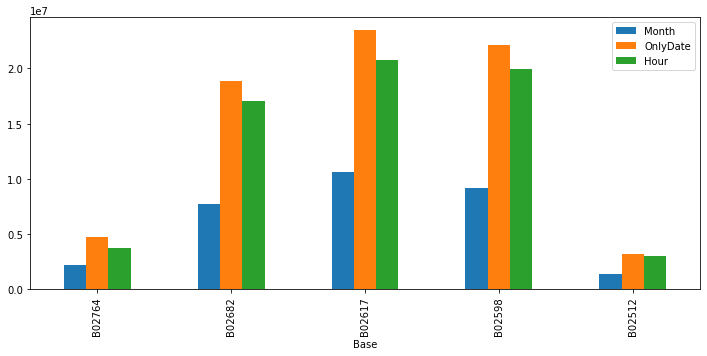

In [22]:
import matplotlib.pyplot as plt
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize = (12,7))
# Categorical data: Country names
df.groupby('Base').sum().sort_values(by="Base",ascending=False).plot.bar(figsize=(12,5))
plt.show()

<AxesSubplot:xlabel='Hour', ylabel='count'>

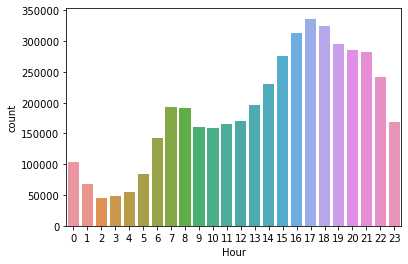

In [23]:
import seaborn as sns
sns.countplot(x = df['Hour'],data = df)

In [24]:
ds=df.groupby(df["OnlyDate"])

In [25]:
ds

In [26]:
X=df.drop("Base",axis=1)
y=df["Base"]

In [27]:
X_train = X[:int(X.shape[0]*0.9)]
X_test = X[int(X.shape[0]*0.9):]
y_train = y[:int(y.shape[0]*0.9)]
y_test = y[int(y.shape[0]*0.9):]

In [28]:
print('Training Observations: %d' % (len(X_train)))
print('Testing Observations: %d' % (len(X_test)))

Training Observations: 4080894
Testing Observations: 453433


In [29]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.ensemble import RandomForestClassifier
# tscv = TimeSeriesSplit(n_splits=5)
# i = 1
# score = []
# for tr_index, val_index in tscv.split(X_train):
#     X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
#     y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
#     print(X_tr.info())
#     print(y_tr)
#     for mf in np.linspace(100, 150):
#         for ne in np.linspace(50, 100):
#             for md in np.linspace(20, 40):
#                 for msl in np.linspace(30, 100):
#                     rfr = RandomForestClassifier(max_features=int(mf),n_estimators=int(ne),max_depth=int(md),min_samples_leaf=int(msl))
#                     rfr.fit(X_tr, y_tr)
#                     score.append([i,mf,ne, md,msl, rfr.score(X_val, y_val)])
                                  
                                  
                                  
#     i += 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 680149 entries, 0 to 680148
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Date      680149 non-null  object
 1   Month     680149 non-null  int64 
 2   OnlyDate  680149 non-null  int64 
 3   Weekday   680149 non-null  object
 4   Hour      680149 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 31.1+ MB
None
0         B02512
1         B02512
2         B02512
3         B02512
4         B02512
           ...  
680144    B02598
680145    B02598
680146    B02598
680147    B02598
680148    B02598
Name: Base, Length: 680149, dtype: object


TypeError: float() argument must be a string or a number, not 'datetime.date'